# Unemployment Analysis
#### Lauryne Assa

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
df2019=pd.read_excel('laucnty19.xlsx')
df2020=pd.read_excel('laucnty20.xlsx')

## Clean Data

In [4]:
#drop columns & rows
df2019=df2019.drop(columns=['Labor Force Data by County, 2019 Annual Averages','Unnamed: 4','Unnamed: 5','Unnamed: 6',
            'Unnamed: 7','Unnamed: 8'])

df2019=df2019.rename(columns={'Unnamed: 1':'fips1',
                      'Unnamed: 2':'fips2',
                      'Unnamed: 3':'county_name',
                      'Unnamed: 9':'unemployment_rate'})

df2019=df2019.drop([0,1,2,3,4])
df2019=df2019.drop([3224,3225,3226])

#assign data types
df2019['fips1']=df2019['fips1'].astype(str)
df2019['fips2']=df2019['fips2'].astype(str)
df2019['fips']=df2019['fips1']+df2019['fips2']
df2019=df2019.drop(columns=['fips1','fips2'])

#keep new york state
df2019=df2019[df2019.county_name.str.contains("NY")]
df2019['year']="2019"

df2019

,county_name,unemployment_rate,fips,year
1832,"Albany County, NY",3.5,36001,2019
1833,"Allegany County, NY",5.3,36003,2019
1834,"Bronx County, NY",5.3,36005,2019
1835,"Broome County, NY",4.5,36007,2019
1836,"Cattaraugus County, NY",4.8,36009,2019
...,...,...,...,...
1889,"Washington County, NY",3.9,36115,2019
1890,"Wayne County, NY",3.9,36117,2019
1891,"Westchester County, NY",3.6,36119,2019
1892,"Wyoming County, NY",4.2,36121,2019


In [5]:
#same thing for all years
df2020=df2020.drop(columns=['Labor Force Data by County, 2020 Annual Averages','Unnamed: 4','Unnamed: 5','Unnamed: 6',
            'Unnamed: 7','Unnamed: 8'])

df2020=df2020.rename(columns={'Unnamed: 1':'fips1',
                      'Unnamed: 2':'fips2',
                      'Unnamed: 3':'county_name',
                      'Unnamed: 9':'unemployment_rate'})

df2020=df2020.drop([0,1,2,3,4])
df2020=df2020.drop([3224,3225,3226])

df2020['fips1']=df2020['fips1'].astype(str)
df2020['fips2']=df2020['fips2'].astype(str)
df2020['fips']=df2020['fips1']+df2020['fips2']
df2020=df2020.drop(columns=['fips1','fips2'])

df2020=df2020[df2020.county_name.str.contains("NY")]
df2020['year']="2020"
df2020

,county_name,unemployment_rate,fips,year
1832,"Albany County, NY",7.2,36001,2020
1833,"Allegany County, NY",8.1,36003,2020
1834,"Bronx County, NY",16,36005,2020
1835,"Broome County, NY",8.7,36007,2020
1836,"Cattaraugus County, NY",9.4,36009,2020
...,...,...,...,...
1889,"Washington County, NY",7.2,36115,2020
1890,"Wayne County, NY",7.4,36117,2020
1891,"Westchester County, NY",8.4,36119,2020
1892,"Wyoming County, NY",7.5,36121,2020


In [6]:
#Concatenate all years together
df=pd.concat([df2019,df2020]).reset_index()
df['unemployment_rate']=df['unemployment_rate'].astype(int)

In [7]:
df.to_csv('unemployment.csv',index=False)

## Visualizations

### New York State Aggregate

Text(0.5, 1.0, 'Unemployment Rate in New York')

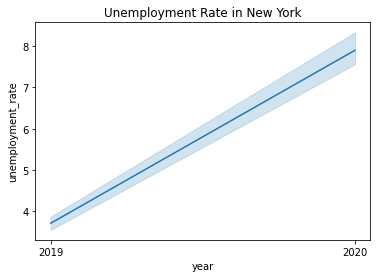

In [9]:
ax=sns.lineplot(data=df,x='year',y='unemployment_rate')
ax.set_title("Unemployment Rate in New York")

### Just New York City

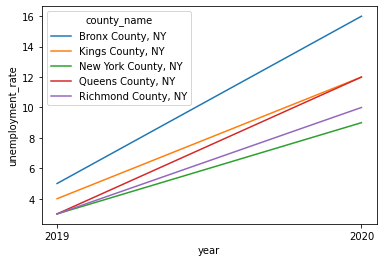

In [10]:
newyorkcity=['New York County, NY','Kings County, NY','Bronx County, NY','Richmond County, NY','Queens County, NY']
dfcity=df[df['county_name'].isin(newyorkcity)]
ax=sns.lineplot(data=dfcity,x='year',y='unemployment_rate',hue='county_name')

### both the aggregate and the set of counties from NYC both show an increase in unemployment from 2019 to 2020